#                                                 Approches Neuronales – TP 2 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import re
import numpy as np
import random
import math
from scipy import linalg

En premier j'ai lu 49 données MINES pour train, puis j'ai lu 55 données Rocks puis j'au fussionner les deux et j'ai, créé les fichiers contennant les étiquettes M (49) ou R (55) selon la source de la donnée.



**Partie 0 : Lecture et normalisation des données**

In [3]:
#Lecture des sonar.mines TRAIN #pour le test le test line[0]== 'C'

#Fonction pour mettre un des valeurs sur la même ligne
def grouper(n, A):
    it = iter(A)
    while True:
       nom = tuple(itertools.islice(it, n))
       if not nom:
           return
       yield nom

##lecture les données
Train=[]
Test=[]
i=0

'''
#Train
with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/sonar.mines") as file:
    lines = file.readlines()
   
for line in lines:
    
    
    if line[0] == '*':
      for k in range(1,11):
       
           
          
          l = lines[i+k].split()
          if len(l) == 6:
           Train.extend(l)
           Train = [s.replace("}", "") for s in Train]
           Train = [s.replace("{", "") for s in Train]
          
    i=i+1

with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/Train_MINES.txt", "w") as f:
  for chunk in grouper(60, Train):
    f.write(" ".join(str(x) for x in chunk) + "\n")
'''

#Test
#62 données pour mines test
with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/sonar.mines") as file:
    lines = file.readlines()
   
for line in lines:
    
    
    if line[0] == 'C':
      for k in range(1,11):
       
           
          
          l = lines[i+k].split()
          if len(l) == 6:
           Test.extend(l)
           Test = [s.replace("}", "") for s in Test]
           Test = [s.replace("{", "") for s in Test]
          
    i=i+1

with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/Test_MINES.txt", "w") as f:
  for chunk in grouper(60, Test):
    f.write(" ".join(str(x) for x in chunk) + "\n")


In [4]:
#Lecture des Train SONAR Rocks 
#pour le test le test line[0]== 'C'
#55 données pour rocks test
#42 données pour rocks test

def grouper(n, A):
    it = iter(A)
    while True:
       nom = tuple(itertools.islice(it, n))
       if not nom:
           return
       yield nom
Train=[]
Test=[]

'''
#Train
with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/sonar.rocks") as file:
    lines = file.readlines()

i=0
k=0   
for line in lines:
    if line[0] == '*':
      for k in range(1,11):
          l = lines[i+k].split()
          if len(l) == 6:
           Train.extend(l)
           Train = [s.replace("}", "") for s in Train]
           Train = [s.replace("{", "") for s in Train]
          
    i=i+1

with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/TrainRocks.txt", "w") as f:

 for chunk in grouper(60, Train):
    f.write(" ".join(str(x) for x in chunk) + "\n")
'''

#Test
with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/sonar.rocks") as file:
    lines = file.readlines()

i=0
k=0   
for line in lines:
    if line[0] == 'C':
      for k in range(1,11):
          l = lines[i+k].split()
          if len(l) == 6:
           Train.extend(l)
           Train = [s.replace("}", "") for s in Train]
           Train = [s.replace("{", "") for s in Train]
          
    i=i+1

with open("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/TestRocks.txt", "w") as f:

 for chunk in grouper(60, Train):
    f.write(" ".join(str(x) for x in chunk) + "\n")

# **Partie 1**

In [5]:
#Loader les données
#comme dans le TP précédant j'avais établie deux classes -1 et 1 mes deux classes seront alors 1=M et -1=R
TrainEtiq = np.genfromtxt('/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/etiqTrain.txt',dtype='str')
TrainData = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/train.txt")


TestData = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/test.txt")
TestEtiq = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/etiq_test.txt")


In [6]:
#Les transformer en float
TrainEtiq = TrainEtiq.astype(np.int)
print(TrainEtiq)
print(TrainData)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
[[0.0491 0.0279 0.0592 ... 0.014  0.0332 0.0439]
 [0.1313 0.2339 0.3059 ... 0.0127 0.0178 0.0231]
 [0.0629 0.1065 0.1526 ... 0.0057 0.0113 0.0131]
 ...
 [0.026  0.0192 0.0254 ... 0.0008 0.0044 0.0077]
 [0.0459 0.0437 0.0347 ... 0.0085 0.0117 0.0056]
 [0.0291 0.04   0.0771 ... 0.0081 0.0139 0.0111]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# J'ai choisie la version Online
 Car le coût de calcul est plus faible en utilisant ONLINE puisque le nombre des itérations est toujours inférieure à ceux de la version BATCH

In [7]:
#version online
def classeCorrectementVecteur(vect1,vect2):
  if np.array_equal(vect1,vect2):
    
      return True 
  return False


def versionOnline(W,alph,X,etiq):
  pred=np.ones(len(X))
  
  IT=0
  while not classeCorrectementVecteur(etiq, pred):
    i=random.randint(0, len(X) - 1)#car les vecteurs commence de 0 à n-1
    x_ = np.append(1, X[i])
    IT+=1
    Dw=0
    if np.transpose(W).dot(x_)> 0 :
       pred[i]=1
    else:
       pred[i]=-1
    if pred[i] != etiq[i] :
      Dw = x_.dot(alph*(etiq[i]-pred[i]))
    W=W+Dw
      
  print(IT)
  return W,pred

In [8]:
#Fonction pour  génerer le vecteur W 
def genererW(P, N):
    #si je n'effectue pas la normalisation mes algo ne s'arrete quasiment pas car beaucoup de valeurs après la virgule
    W = np.random.randint(-100,100,N+1)/100
    return   W

In [9]:
#pour tester l'apprentissage ce qui nous donne
def TrouverEtiquette(W,x):
  ones = np.ones((len(x),1))
  x_ = np.append(ones,x,axis=1)
  pred=np.ones(len(x_))
  res =x_.dot(W)
  #J'utilise np.sign ou lieu de faire une comparaison une par une
  etiq = np.sign(res)
  
  return  etiq


In [10]:
'''L'erreur de généralisation = l'erreur sur de nouvelles données
   comme par exemple : (Ea=10,8,6 fautes) alors on doit calculer combier y'a t'il de fautes.
'''
def Error(Etiq , predicted):

  return (Etiq != predicted).sum()

def generalisation(NBtot,NbErr) :
    NbBienClasse=NBtot-NbErr
    return NbBienClasse/NBtot

In [11]:
N = 60 #les colonnes
P = 104 #les lignes
alph = 0.01   
W_=genererW(P, N)


#1). Apprentissage  sur  « train »
W1 ,pred1 = versionOnline(W_,alph,TrainData,TrainEtiq)


112159


In [12]:
print(W1)

[-0.62      0.321112  1.311786  0.852308  0.386     0.898588  0.184498
  0.124354 -1.067576  0.015672  0.768406  0.108716  0.139172  0.106714
 -0.148046  0.455992 -1.068554 -0.711682  1.575312 -0.350816 -0.105636
 -0.171094  0.288502 -0.30584   0.644714  0.008436 -0.104706  0.104668
 -0.175152 -0.116612  1.267892 -1.889016  1.338556 -0.926636  0.533326
 -0.359322 -0.116036 -0.217144 -0.054468  0.979204 -0.94651   0.424094
 -0.129438  0.036264 -0.546578  0.796746  0.742158 -0.535704  1.066706
  2.104716 -1.364506 -0.572488 -0.192442  1.025616 -0.088064  0.76711
 -0.592926  0.656586  1.16481  -0.92717  -0.496642]


In [13]:
#a.1) Ici nous allons trouver les etiquettes avec les Data d'apprentissage SUR lesquels il a appris
EtiquettePrediteTrain = TrouverEtiquette(W1,TrainData)
Ea = Error(TrainEtiq,EtiquettePrediteTrain)
print("Erreur d'apprentissage",Ea)

'''
Exemple :
Erreur d'apprentissage 2
'''

Erreur d'apprentissage 3


"\nExemple :\nErreur d'apprentissage 2\n"

In [14]:
#a.2)
#Trouver etiquette avec les données de Test qui ne connais pas TESTER avec TEST
testPrediction=TrouverEtiquette(W1,TestData)

#Voir les deux
'''
print(TestEtiq)
print(testPrediction)'''

#Compter les erreurs gen
NbErr = Error(TestEtiq,testPrediction)
print(NbErr)
Eg=generalisation(P,NbErr)
print("Erreur de généralisation",Eg)


22
Erreur de généralisation 0.7884615384615384


In [15]:
#b)afficher N+1 Weights
print("N+1 weights")
print(W1)

N+1 weights
[-0.62      0.321112  1.311786  0.852308  0.386     0.898588  0.184498
  0.124354 -1.067576  0.015672  0.768406  0.108716  0.139172  0.106714
 -0.148046  0.455992 -1.068554 -0.711682  1.575312 -0.350816 -0.105636
 -0.171094  0.288502 -0.30584   0.644714  0.008436 -0.104706  0.104668
 -0.175152 -0.116612  1.267892 -1.889016  1.338556 -0.926636  0.533326
 -0.359322 -0.116036 -0.217144 -0.054468  0.979204 -0.94651   0.424094
 -0.129438  0.036264 -0.546578  0.796746  0.742158 -0.535704  1.066706
  2.104716 -1.364506 -0.572488 -0.192442  1.025616 -0.088064  0.76711
 -0.592926  0.656586  1.16481  -0.92717  -0.496642]


Stabilité

sachant Une grande stabilité positive assure une certaine robustesse de la réponse du neurone.(reference cours: APPRENTISSAGE ET GENERALISATION...)


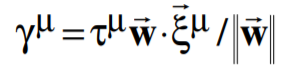

In [16]:
#c)
def Stabilite(etiq,W,X):
    X = np.append(np.ones((len(X),1)),X,axis=1)
    enum=etiq*np.dot(X,W)
    return enum/linalg.norm(W)

#Calculer stabilité
j=Stabilite(TestEtiq,W1,TestData)
print("Stabilité")
print(j)

Stabilité
[-5.38070101e-02 -5.09267260e-02 -2.15629286e-02  2.10257832e-02
 -4.68567908e-02  4.33854886e-02 -1.53793294e-02  1.01855681e-01
  1.44419869e-02 -1.61511674e-02  6.65581538e-02 -3.95985606e-03
  2.75075541e-02  1.36982702e-02  9.49947134e-02 -3.17419362e-02
  2.00084457e-02  1.20780580e-02  1.33895041e-01  1.08084166e-01
 -7.73755186e-02  6.24854198e-02  5.02774004e-02  3.58871186e-02
  1.45599167e-01  1.96254775e-02  7.79666598e-02  7.58293050e-02
 -3.15974538e-02  1.35071573e-02 -6.43556017e-03 -3.45065196e-02
  4.97358581e-02  4.16673571e-02  1.08996882e-02  9.24222738e-02
 -1.76754464e-02 -2.07822621e-02  3.43215992e-02  5.83255096e-02
  6.43857368e-02  1.08779729e-01  1.71920936e-02  1.76537320e-01
  9.80981652e-02  1.22043341e-01  9.14546428e-02  8.71443478e-02
  2.65403247e-02  3.26200791e-02  2.74926767e-02  1.04333885e-02
 -2.74355668e-02  5.13282456e-02  4.64851830e-02  6.08043444e-02
  1.10158401e-01  4.68199554e-02  4.17783431e-02  3.61299755e-02
  3.74520458e-0

Plot de Stabilité


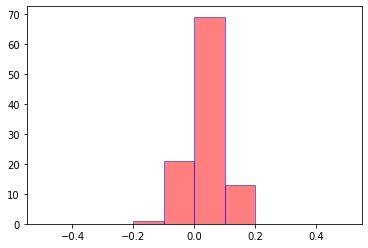

In [17]:
#d)
def plotstab(s):
    plt.hist(s, range=(-0.5, 0.5), bins=10, facecolor='red', alpha=0.5,edgecolor='blue')
    plt.show()
print("Plot de Stabilité")
plotstab(j)


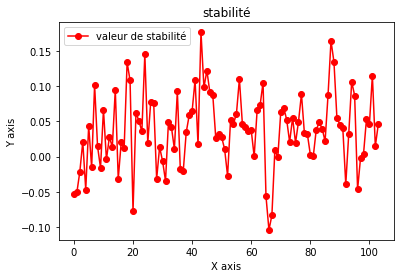

In [18]:
#pour tester une autre figure
x = np.array(range(0, 104))
plt.title("stabilité")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, j, color = "red", marker = "o", label = "valeur de stabilité")
plt.legend()
plt.show()

24700
Erreur d'apprentissage 2
28
Erreur de généralisation 0.7307692307692307
N+1 weights
[-0.13     -0.651584  0.851674  0.736046  0.219408 -0.435296 -0.556018
 -1.369112 -0.419356  1.076214  0.404362  0.695332  0.56621   0.84208
 -0.618996 -0.15266   0.264772  0.595982 -1.299014  0.409828 -0.300528
  0.848834 -0.442864  0.55633  -0.096158 -0.072956 -0.432972 -0.098802
 -0.046076  0.631456 -0.911808  0.178678  0.204076 -0.270302 -0.297166
  0.12116   0.092668 -1.494602  0.617084 -0.038252 -0.060724 -0.21531
  0.308158  0.668774  0.846664  0.837994  0.010702  0.13351   0.171596
  0.955458 -0.87947  -0.528832  0.016968  0.201336 -0.837694 -0.639152
 -0.522486 -0.913602  0.381778  0.108166 -0.896778]
Stabilité [ 2.23686482e-02  2.24833461e-01  1.51364151e-02  3.06715648e-02
 -4.95705731e-03  1.12873232e-02  3.70148152e-03  1.94193529e-02
  1.19469069e-04  6.03071600e-02  1.97396182e-02  2.48845421e-02
  2.50221294e-02  3.16788971e-02  1.15922056e-02  7.36357475e-03
  2.68101591e-02  1.00

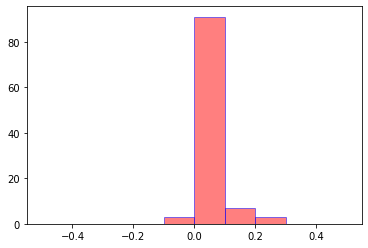

In [29]:
#2. Apprentissage sur « test »
W_test=genererW(P, N)
W2,pred2 = versionOnline(W_test,alph,TestData,TestEtiq)

#a.1)
#Ici nous allons trouver les etiquettes avec les Data TEST SUR lesquels il a appris
EtiquettePrediteTest = TrouverEtiquette(W2,TestData)
Ea_test = Error(TestEtiq,EtiquettePrediteTest)
print("Erreur d'apprentissage",Ea_test)



#Trouver etiquette avec les données de Train qui ne connais pas TESTER avec Train
trainPrediction_=TrouverEtiquette(W2,TrainData)


#a.2)
#Compter les erreurs generalz
NbErr=Error(TrainEtiq,trainPrediction_)
print(NbErr)
Eg=generalisation(P,NbErr)
print("Erreur de généralisation",Eg)




#b)Afficher W
print("N+1 weights")
print(W2)

#c) Calculer stabilité
j=Stabilite(TrainEtiq,W1,TrainData)
print("Stabilité",j)

#d)
def plotstab(s):
    plt.hist(s, range=(-0.5, 0.5), bins=10, facecolor='red', alpha=0.5,edgecolor='blue')
    plt.show()
print("Plot de Stabilité")
plotstab(j)

# **Partie 2 : Pocket**
1.   Notre nouvel algorithme Pocket depends de 2 parametre le nombre d'itérations et le nombre d'erreurs.
2.   Il garde le meilleur résultat de l’algorithme du perceptron en fonctions des itérations Nb d’erreurs prédéfini.

In [20]:
#Algo pocket
def AlgorithmePocket(X, etiq, alph, N_it, N_Er,W):
  
  pred=np.ones(len(etiq))#mon tableau d'étiquettes que je vais prédir
  X = np.append(np.ones((len(X),1)),X,axis=1)
  Dw=0

  for i in range(N_it):
      res = X.dot(W)
      pred=np.sign(res)
      
      
      if  not classeCorrectementVecteur(etiq, pred) :
        Dw = np.transpose(X).dot(alph*(etiq-pred))
        W=W+Dw

      N_Er_Occured = Error(etiq,pred)

      if N_Er_Occured <= N_Er :
        break;

  
  return W



In [21]:
#Fonction pour RAMDON INITIALISATION et Hebb
def initialisation(X,N,etiq):
    #Random
    W_RA = np.random.randint(-100,100,N+1)/100
    
    
    #HEBB
    
    #Step 1 mettre en place les weights
    W_hebb = np.zeros((N+1))
    
    #Step 2  mettre en place input X
    X = np.append(np.ones((len(X),1)),X,axis=1)

    #Step 3  mettre en place pred
    pred=etiq

    for i in range(len(X)):
     
      #Step 4 w(nouveau) = w(vieux) + xi*yi  
      W_hebb=W_hebb+(X[i]*pred[i])

    
    W_hebb=W_hebb/100
      

    return W_RA,W_hebb





#APPRENTISSAGE TRAIN et Test avec 
- Alpha = 0.7 , 0.4 , 0.01
- Erreurlimit = 3, 6 , 8 , 10
- Et selon les deux initialisation
- nombre iteration = 8000

In [28]:
####################################################### APPRENTISSAGE TRAIN ######################################################################

#Run Pocket with 2 initialisation    
W_RA,W_hebb = initialisation(TrainData,N,TrainEtiq)


####################################
print("alph=0.7 Ea_=3")
alph=0.7
Ea_=3

print("random")
#Initialisation Random
W_pocketRandom = AlgorithmePocket(TrainData, TrainEtiq, alph, 8000, Ea_, W_RA)

#-------------------------------------------------------------
EtiquettePredite_1 = TrouverEtiquette(W_pocketRandom,TrainData)
Ea_1 = Error(TrainEtiq,EtiquettePredite_1)
print("Erreur d'apprentissage",Ea_1)
#---
EtiquettePredite_2=TrouverEtiquette(W_pocketRandom,TestData)
Eg_1 = Error(TestEtiq,EtiquettePredite_2)
print("Erreur de généralisation",Eg_1)

#-------------------------------------------------------------


print("hebb")
#Initialisation Hebb
W_pocketHEBB = AlgorithmePocket(TrainData, TrainEtiq, alph, 8000, Ea_, W_hebb)

#-------------------------------------------------------------
EtiquettePredite_3 = TrouverEtiquette(W_pocketHEBB,TrainData)
Ea_2 = Error(TrainEtiq,EtiquettePredite_3)
print("Erreur d'apprentissage",Ea_2)
#---
EtiquettePredite_4=TrouverEtiquette(W_pocketHEBB,TestData)
Eg_2 = Error(TestEtiq,EtiquettePredite_4)
print("Erreur de généralisation",Eg_2)
#-------------------------------------------------------------



####################################
print("alph=0.4 Ea_=3")

alph=0.4
Ea_=3

print("random")
#Initialisation Random
W_pocketRandom = AlgorithmePocket(TrainData, TrainEtiq, alph, 8000, Ea_, W_RA)

#-------------------------------------------------------------
EtiquettePredite_9 = TrouverEtiquette(W_pocketRandom,TrainData)
Ea_5 = Error(TrainEtiq,EtiquettePredite_9 )
print("Erreur d'apprentissage",Ea_5)
#---
EtiquettePredite_10=TrouverEtiquette(W_pocketRandom,TestData)
Eg_5 = Error(TestEtiq,EtiquettePredite_10)
print("Erreur de généralisation",Eg_5)
#-------------------------------------------------------------

print("hebb")
#Initialisation Hebb
W_pocketHEBB = AlgorithmePocket(TrainData, TrainEtiq, alph, 8000, Ea_, W_hebb)

#-------------------------------------------------------------
EtiquettePredite_11 = TrouverEtiquette(W_pocketHEBB,TrainData)
Ea_6 = Error(TrainEtiq,EtiquettePredite_11)
print("Erreur d'apprentissage",Ea_6)
#---
EtiquettePredite_12=TrouverEtiquette(W_pocketHEBB,TestData)
Eg_6 = Error(TestEtiq,EtiquettePredite_12)
print("Erreur de généralisation",Eg_6)
#-------------------------------------------------------------


####################################
print("alph=0.01 Ea_=3")

alph=0.01
Ea_=3

print("random")
#Initialisation Random
W_pocketRandom = AlgorithmePocket(TrainData, TrainEtiq, alph, 8000, Ea_, W_RA)

#-------------------------------------------------------------
EtiquettePredite_5 = TrouverEtiquette(W_pocketRandom,TrainData)
Ea_3 = Error(TrainEtiq,EtiquettePredite_5 )
print("Erreur d'apprentissage",Ea_3)
#---
EtiquettePredite_6=TrouverEtiquette(W_pocketRandom,TestData)
Eg_3 = Error(TestEtiq,EtiquettePredite_6)
print("Erreur de généralisation",Eg_3)
#-------------------------------------------------------------

print("hebb")
#Initialisation Hebb
W_pocketHEBB = AlgorithmePocket(TrainData, TrainEtiq, alph, 8000, Ea_, W_hebb)

#-------------------------------------------------------------
EtiquettePredite_7 = TrouverEtiquette(W_pocketHEBB,TrainData)
Ea_4 = Error(TrainEtiq,EtiquettePredite_7)
print("Erreur d'apprentissage",Ea_4)
#---
EtiquettePredite_8=TrouverEtiquette(W_pocketHEBB,TestData)
Eg_4 = Error(TestEtiq,EtiquettePredite_8)
print("Erreur de généralisation",Eg_4)
#-------------------------------------------------------------







alph=0.7 Ea_=3
random
Erreur d'apprentissage 11
Erreur de généralisation 23
hebb
Erreur d'apprentissage 20
Erreur de généralisation 21
alph=0.4 Ea_=3
random
Erreur d'apprentissage 27
Erreur de généralisation 21
hebb
Erreur d'apprentissage 25
Erreur de généralisation 30
alph=0.01 Ea_=3
random
Erreur d'apprentissage 10
Erreur de généralisation 23
hebb
Erreur d'apprentissage 9
Erreur de généralisation 23


In [23]:
####################################################### APPRENTISSAGE sur TEST  ######################################################################

#Run Pocket with 2 initialisation    
W_RA,W_hebb = initialisation(TestData,N,TestEtiq)


####################################
print("alph=0.7 Ea_=3")
alph=0.7
Ea_=3

print("random")
#Initialisation Random
W_pocketRandom = AlgorithmePocket(TestData, TestEtiq, alph, 8000, Ea_, W_RA)

#-------------------------------------------------------------
EtiquettePredite_1 = TrouverEtiquette(W_pocketRandom,TestData)
Ea_1 = Error(TestEtiq,EtiquettePredite_1)
print("Erreur d'apprentissage",Ea_1)
#---
EtiquettePredite_2=TrouverEtiquette(W_pocketRandom,TrainData)
Eg_1 = Error(TrainEtiq,EtiquettePredite_2)
print("Erreur de généralisation",Eg_1)
#-------------------------------------------------------------


print("hebb")
#Initialisation Hebb
W_pocketHEBB = AlgorithmePocket(TestData, TestEtiq, alph, 8000, Ea_, W_hebb)

#-------------------------------------------------------------
EtiquettePredite_3 = TrouverEtiquette(W_pocketHEBB,TestData)
Ea_2 = Error(TestEtiq,EtiquettePredite_3)
print("Erreur d'apprentissage",Ea_2)
#---
EtiquettePredite_4=TrouverEtiquette(W_pocketHEBB,TrainData)
Eg_2 = Error(TrainEtiq,EtiquettePredite_4)
print("Erreur de généralisation",Eg_2)
#-------------------------------------------------------------



####################################
print("alph=0.4 Ea_=3")

alph=0.4
Ea_=3

print("random")
#Initialisation Random
W_pocketRandom = AlgorithmePocket(TestData, TestEtiq, alph, 8000, Ea_, W_RA)

#-------------------------------------------------------------
EtiquettePredite_9 = TrouverEtiquette(W_pocketRandom,TestData)
Ea_5 = Error(TestEtiq,EtiquettePredite_9 )
print("Erreur d'apprentissage",Ea_5)
#---
EtiquettePredite_10=TrouverEtiquette(W_pocketRandom,TrainData)
Eg_5 = Error(TrainEtiq,EtiquettePredite_10)
print("Erreur de généralisation",Eg_5)
#-------------------------------------------------------------

print("hebb")
#Initialisation Hebb
W_pocketHEBB = AlgorithmePocket(TestData, TestEtiq, alph, 8000, Ea_, W_hebb)

#-------------------------------------------------------------
EtiquettePredite_11 = TrouverEtiquette(W_pocketHEBB,TestData)
Ea_6 = Error(TestEtiq,EtiquettePredite_11)
print("Erreur d'apprentissage",Ea_6)
#---
EtiquettePredite_12=TrouverEtiquette(W_pocketHEBB,TrainData)
Eg_6 = Error(TrainEtiq,EtiquettePredite_12)
print("Erreur de généralisation",Eg_6)
#-------------------------------------------------------------


####################################
print("alph=0.01 Ea_=3")

alph=0.01
Ea_=3

print("random")
#Initialisation Random
W_pocketRandom = AlgorithmePocket(TestData, TestEtiq, alph, 8000, Ea_, W_RA)

#-------------------------------------------------------------
EtiquettePredite_5 = TrouverEtiquette(W_pocketRandom,TestData)
Ea_3 = Error(TestEtiq,EtiquettePredite_5 )
print("Erreur d'apprentissage",Ea_3)
#---
EtiquettePredite_6=TrouverEtiquette(W_pocketRandom,TrainData)
Eg_3 = Error(TrainEtiq,EtiquettePredite_6)
print("Erreur de généralisation",Eg_3)
#-------------------------------------------------------------

print("hebb")
#Initialisation Hebb
W_pocketHEBB = AlgorithmePocket(TestData, TestEtiq, alph, 8000, Ea_, W_hebb)

#-------------------------------------------------------------
EtiquettePredite_7 = TrouverEtiquette(W_pocketHEBB,TestData)
Ea_4 = Error(TestEtiq,EtiquettePredite_7)
print("Erreur d'apprentissage",Ea_4)
#---
EtiquettePredite_8=TrouverEtiquette(W_pocketHEBB,TrainData)
Eg_4 = Error(TrainEtiq,EtiquettePredite_8)
print("Erreur de généralisation",Eg_4)
#-------------------------------------------------------------

alph=0.7 Ea_=3
random
Erreur d'apprentissage 4
Erreur de généralisation 23
hebb
Erreur d'apprentissage 6
Erreur de généralisation 23
alph=0.4 Ea_=3
random
Erreur d'apprentissage 6
Erreur de généralisation 22
hebb
Erreur d'apprentissage 5
Erreur de généralisation 22
alph=0.01 Ea_=3
random
Erreur d'apprentissage 5
Erreur de généralisation 22
hebb
Erreur d'apprentissage 5
Erreur de généralisation 21


# Partie 3 

Apprentissage  sur « train + test ».  Utiliser l’algorithme du perceptron pour  apprendre l’ensemble fusionné L = train + test (avec les classes tau)
L’ensemble L est LS ou pas LS ? Justifier votre réponse en fonction des calculs de vos programmes

In [24]:
TrainTestData = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/train_test.txt")
TrainTestTestEtiq = np.loadtxt("/content/drive/MyDrive/M2Avignon/ApprocheNeuronales/Donnees/train_test_Etiq.txt")


In [25]:
#2. Apprentissage Version Online et Pocket
P_All=208
alph=0.1

W_TrainTest=genererW(P_All, N)

w_all,predAll=versionOnline(W_TrainTest,alph,TrainTestData,TrainTestTestEtiq)


#c'est à dire on ne tolère aucune erreur pour qu'il soit linéairement séparable
W_pocketAllData = AlgorithmePocket(TrainTestData, TrainTestTestEtiq, alph, 8000, 0, W_TrainTest)

print(predAll)


print(w_all)


print(W_pocketAllData)

11612774
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-1.7510000e+01  3.9848380e+01  5.5509000e+00 -6.9372400e+01
  3.0668480e+01 -1.3797060e+01  1.8064460e+01 -2.4138880e+01
 -2.0483160e+01  2.81591

Stabilité [ 2.60470256e-03  2.95600089e-03  3.16418619e-03  3.54105568e-03
  7.58658662e-04  6.68378533e-04  8.87341058e-03  4.39093936e-03
 -1.48778028e-03  1.89040894e-02  1.05599203e-02  2.81109443e-02
  2.67357019e-02  3.07342915e-02  2.20562100e-02  6.28213418e-04
  4.62534161e-03  2.42135947e-02  8.44894835e-03  4.92582423e-02
  8.82274624e-02  3.64924913e-02  3.88323101e-02  4.32105422e-03
  1.70633540e-02  9.41335887e-05  2.64062195e-03  1.48588406e-03
  2.29056976e-03  2.08634418e-02  2.32789979e-02  9.30965582e-03
  2.79857828e-03  2.01513381e-02  3.19704689e-02  2.20490058e-02
  3.05543939e-02  4.13433844e-04  3.45659284e-04  2.29634150e-02
  6.57063624e-02  4.86713336e-02  3.72009968e-02  6.18529245e-03
  2.43863292e-03  3.18164459e-02  5.12923246e-02  1.67394637e-02
  9.21502593e-03  1.53225302e-02  3.52264331e-02  2.67097691e-03
  2.94984880e-03  1.64028281e-03  5.45318382e-02  1.93642628e-03
  1.18540504e-04  1.27868331e-03  1.35153895e-02  6.12181582e-03
  6.02209577e-0

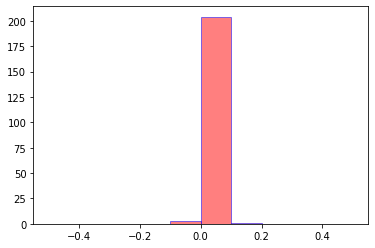

In [26]:
#Calculer stabilité
S=Stabilite( TrainTestTestEtiq,w_all,TrainTestData)
print("Stabilité",S)

def plotstab(s):
    plt.hist(s, range=(-0.5, 0.5), bins=10, facecolor='red', alpha=0.5,edgecolor='blue')
    plt.show()
print("Plot de Stabilité")
plotstab(S)

sources :

https://www.geeksforgeeks.org/hebbian-learning-rule-with-implementation-of-and-gate/


http://webcache.googleusercontent.com/search?q=cache:vu5HrFkOBGcJ:www.info2.uqam.ca/~boukadoum_m/DIC9310/Notes/4-5-DIC9310%2520RNA.doc+&cd=3&hl=fr&ct=clnk&gl=fr


https://tel.archives-ouvertes.fr/tel-00390069/file/these_torres_presentation.pdf

